RNN # keras SimpleRNN 'output of each layer'

''' connect input to network '''

nnViz3D.connect_input_to_network ( inputWeights [ inputDimensionality x firstLayerNeurons ] )

nnViz3D.connect_layers_within_timestep ( non-RNN + vertical connections )
nnViz3D.connect_to_prev_timestep 


$hiddenState (vector) = activationFunction ( prevHiddenState ( vector) \cdot recurrentWeights (matrix) + inputs (vector) \cdot inputWeights (matrix) + bias (vector) ) $

$recurrentWeights = H*H$

$inputWeights = I*H$

activation function is a pointwise operator

In [2]:
'''
stateful RNN  
'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

from keras.layers import Dense, SimpleRNN, LSTM
from keras.models import Sequential

ModuleNotFoundError: No module named 'keras'

In [13]:
trainingParams = {}
trainingParams['batchSize'] = 16
trainingParams['unrolledTimesteps'] = 20
trainingParams['inputDimensionality'] = 10
trainingParams['forwardSamplesToPredict'] = 1
trainingParams['outputDimensionality'] = 1 
trainingParams['trainEpochs'] = 100

In [14]:
print('Creating Model')
model = Sequential()

# input layer 
model.add( SimpleRNN( 3,
                batch_input_shape = ( trainingParams['batchSize'], 
                                      trainingParams['unrolledTimesteps'],
                                      trainingParams['inputDimensionality'] ),
                stateful = True,
                implementation = 2) ) # required for stateful LSTMs
# output layer
model.add( Dense( 1, activation='linear') )

Creating Model


## Define Hyper-Parameters

In [15]:
model.layers[0].weights

[<tf.Variable 'simple_rnn_4/kernel:0' shape=(10, 3) dtype=float32_ref>,
 <tf.Variable 'simple_rnn_4/recurrent_kernel:0' shape=(3, 3) dtype=float32_ref>,
 <tf.Variable 'simple_rnn_4/bias:0' shape=(3,) dtype=float32_ref>]

## Generate Target Dataset

In [5]:
xRange = np.linspace(start=0, stop=25*np.pi, num=25000)
targetData = np.cos( xRange ) * xRange

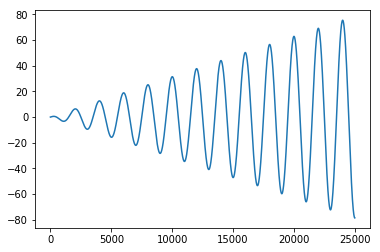

In [6]:
import matplotlib.pyplot as plt
plt.plot( targetData )
plt.show()

## Generate Training Matrix -- Input/Output Batches

In [7]:
def get_batched_data(inputData, trainingParams):
    
    if len(inputData.shape) == 1:
        inputData = np.expand_dims( inputData, 1)

    RNNBatchSamples = int ( trainingParams['batchSize'] * trainingParams['unrolledTimesteps'] )
    totalBatchesInDataset = int ( len(inputData) / RNNBatchSamples )
    
    batchedInputMatrix = np.zeros( ( int(totalBatchesInDataset), 
                                    int(trainingParams['batchSize']), 
                                    int(trainingParams['unrolledTimesteps']), 
                                    int(trainingParams['inputDimensionality']) ) )
    
    batchedOutputMatrix = np.zeros ( ( int(totalBatchesInDataset),
                                      int(trainingParams['batchSize']),
                                      int(trainingParams['outputDimensionality']) ) )
    
    assert trainingParams['outputDimensionality'] == trainingParams['forwardSamplesToPredict']
    
    for iInputDimension in range ( trainingParams['inputDimensionality'] ):
        for iBatch in range( totalBatchesInDataset ):
            startIndex = iBatch * RNNBatchSamples
            endIndex = startIndex + RNNBatchSamples

            batchedInputMatrix[iBatch, :, :, iInputDimension] = np.reshape( inputData[ startIndex:endIndex, iInputDimension ],
                                                                           ( trainingParams['batchSize'],
                                                                            trainingParams['unrolledTimesteps']) )
            # within a batch
            for iBatchElement in range ( trainingParams['batchSize'] ):
                batchElementEnd = startIndex + trainingParams['unrolledTimesteps'] * iBatchElement
                batchElementPredictedTarget = batchElementEnd + trainingParams['forwardSamplesToPredict']
                print( inputData[ batchElementEnd : batchElementPredictedTarget] )
                batchedOutputMatrix[iBatch, iBatchElement ] = inputData[ batchElementEnd : batchElementPredictedTarget]
    
    return batchedInputMatrix, batchedOutputMatrix

In [8]:
batchedInputMatrix, batchedOutputMatrix = get_batched_data ( targetData, trainingParams )

[[ 0.]]
[[ 0.06271037]]
[[ 0.12467772]]
[[ 0.18516392]]
[[ 0.24344061]]
[[ 0.29879395]]
[[ 0.35052941]]
[[ 0.39797635]]
[[ 0.44049253]]
[[ 0.47746844]]
[[ 0.50833142]]
[[ 0.53254965]]
[[ 0.54963581]]
[[ 0.55915063]]
[[ 0.56070601]]
[[ 0.55396796]]
[[ 0.53865926]]
[[ 0.51456168]]
[[ 0.481518]]
[[ 0.43943358]]
[[ 0.38827766]]
[[ 0.32808424]]
[[ 0.25895261]]
[[ 0.1810475]]
[[ 0.09459887]]
[[ -9.87039401e-05]]
[[-0.10268701]]
[[-0.21274555]]
[[-0.32979323]]
[[-0.45329052]]
[[-0.58264179]]
[[-0.71719817]]
[[-0.85626063]]
[[-0.99908337]]
[[-1.1448776]]
[[-1.29281549]]
[[-1.44203447]]
[[-1.59164169]]
[[-1.74071881]]
[[-1.88832685]]
[[-2.03351132]]
[[-2.17530746]]
[[-2.31274555]]
[[-2.4448564]]
[[-2.57067686]]
[[-2.68925532]]
[[-2.79965731]]
[[-2.90097101]]
[[-2.99231272]]
[[-3.07283227]]
[[-3.1417183]]
[[-3.19820342]]
[[-3.24156918]]
[[-3.27115089]]
[[-3.28634215]]
[[-3.28659919]]
[[-3.27144497]]
[[-3.24047287]]
[[-3.19335018]]
[[-3.12982121]]
[[-3.04971001]]
[[-2.95292279]]
[[-2.83944987]]
[

In [9]:
batchedInputMatrix.shape

(78, 16, 20, 1)

In [10]:
batchedOutputMatrix.shape

(78, 16, 1)

## Define Model Architecture

In [29]:
print('Creating Model')
model = Sequential()

# input layer 
model.add( LSTM( 30,
                batch_input_shape = ( trainingParams['batchSize'], 
                                      trainingParams['unrolledTimesteps'],
                                      trainingParams['inputDimensionality'] ),
                return_sequences = False )

# output layer
model.add( Dense( 10, activation='sigmoid') )
# output layer
model.add( Dense( 1, activation='linear') )

Creating Model


In [30]:
model.compile(loss='mse', optimizer='rmsprop')

## Training Loop

In [31]:
model.reset_states()
for iEpoch in range( trainingParams['trainEpochs'] ):
    for iBatch in range (  batchedInputMatrix.shape[0] ):
        model.fit( batchedInputMatrix[iBatch],
                   batchedOutputMatrix[iBatch],
                   batch_size = trainingParams['batchSize'],
                   verbose = 0,
                   epochs = 1,
                   shuffle = False)


In [15]:
predictedOutput = np.array([])
targetOutput = np.array([])

16 16
32 16
48 16
64 16
80 16
96 16
112 16
128 16
144 16
160 16
176 16
192 16
208 16
224 16
240 16
256 16
272 16
288 16
304 16


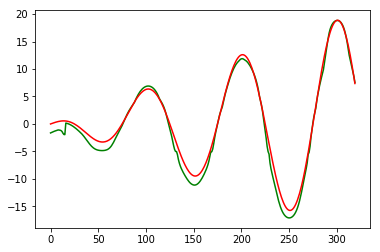

In [16]:
for iEpoch in range (20):
    currentPredictions = model.predict(batchedInputMatrix[iEpoch], batch_size=trainingParams['batchSize'])
    currentTargets = batchedOutputMatrix[iEpoch]
    if iEpoch == 0:
        predictedOutput = currentPredictions
        targetOutput = currentTargets
    else:
        print(str(len(predictedOutput)) + ' ' + str(len(currentPredictions)))
        predictedOutput = np.vstack ( ( predictedOutput, currentPredictions ) )
        targetOutput = np.vstack( ( targetOutput, currentTargets ) )
    
plt.figure()
plt.plot( predictedOutput, 'g' )
plt.plot( targetOutput, 'r' )
plt.show()

In [ ]:
predicted_output.shape

## Save Model

## Explore Weights

In [13]:
model.layers

In [18]:
inputValues = model.layers[0].input
inputWeights = model.layers[0].weights[0]
recurrentWeights = model.layers[0].weights[1]
biasWeights = model.layers[0].weights[2]

In [21]:
import keras.backend as K

In [22]:
K.get_value(inputWeights) # connected from each time sample [ within unrolled range ] to hidden neurons 

array([[ -4.15476679e-04,  -2.20442172e-02,   3.26324739e-02,
         -2.28928462e-01,   3.68743926e-01,   2.47989725e-02,
         -3.31259780e-02,  -3.19969933e-03,  -3.59528996e-02,
         -1.15775593e-01,  -6.59571867e-03,   1.79159921e-02,
          1.98230846e-03,  -1.30835369e-01,   4.47070785e-02,
          1.03759617e-02,   1.43514760e-03,   1.06242904e-03,
          2.07542144e-02,  -5.64674437e-02,   1.17580734e-01,
          8.88006836e-02,   6.46439940e-02,  -1.86434705e-02,
         -2.77906172e-02,   2.66716741e-02,   3.10141027e-01,
         -6.95167705e-02,   7.61083961e-02,   3.23372573e-01,
         -1.63814053e-02,   7.96868373e-03,  -1.08593358e-02,
         -5.37204206e-01,   2.64123291e-01,   1.28975948e-02,
         -2.21128967e-02,   1.20470310e-02,   2.87738699e-03,
         -1.01040967e-01]], dtype=float32)

In [24]:
inputValues

<tf.Tensor 'lstm_1_input:0' shape=(16, 20, 1) dtype=float32>

In [26]:
inputWeights

<tf.Variable 'lstm_1/kernel:0' shape=(1, 40) dtype=float32_ref>

In [27]:
recurrentWeights

<tf.Variable 'lstm_1/recurrent_kernel:0' shape=(10, 40) dtype=float32_ref>

In [28]:
biasWeights

<tf.Variable 'lstm_1/bias:0' shape=(40,) dtype=float32_ref>

In [ ]:
K.get_value(inputWeights)

In [17]:
model.layers[0].get_config()

{'activation': 'tanh',
 'activity_regularizer': None,
 'batch_input_shape': (16, 20, 1),
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dropout': 0.0,
 'dtype': 'float32',
 'go_backwards': False,
 'implementation': 0,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'name': 'lstm_1',
 'recurrent_activation': 'hard_sigmoid',
 'recurrent_constraint': None,
 'recurrent_dropout': 0.0,
 'recurrent_initializer': {'class_name': 'Orthogonal',
  'config': {'gain': 1.0, 'seed': None}},
 'recurrent_regularizer': None,
 'return_sequences': False,
 'stateful': True,
 'trainable': True,
 'unit_forget_bias': True,
 'units': 10,
 'unroll': False,
 'use_bias': True}

In [ ]:
type(trainingParams['inputDimensionality'])

In [ ]:
           ?6-> [ ]
            ?7\  | 5? 
[ ] 3-> [ ]  4-> [ ]
        |    /
        1   [ ] 
        |  /2
        1  + bias 

weights 
    input-> gate_1 [i.e., units] , gate_2 [i.e., units], gate_3 [i.e., units], + recurrent_mix [i.e., units ]
    
    recurrent_state_influencer1 -> activate ( (recurrent_weights * prev_state) + recurrent_input_influencer) + ?bias)
    recurrent_state_influencer2 -> input_direct_state_influence_matrix * input
    reccurent_state = rsInfluencer_1 * weights + rsInfluencer_2 * weights
    
    output_state -> ativate ( updated_recurrent_state + input_influence_on_output )
    
    
    
    gate 1 =  activation { ( [ input * gate_1_weights ] + input_bias ) + ( prev_state * recurrent_gate_1_weights ) }
    

In [ ]:
# with a Sequential model
import keras.backend as K

get_LSTM_output = K.function([model.layers[0].input],
                             [model.layers[0].output])